# 0.2 Neural Network classification with pytorch

Classficiation is a problem of predicting whether something is one thing or another (there can be multiple things as the options)



## 1. Make classification data and get it ready

In [1]:
import sklearn 
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# create circles

X,y = make_circles(n_samples, noise=0.03, random_state=42) # random state is like random seed

In [2]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [7]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2" : X[:,1], "labels":y})
circles[:10]

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


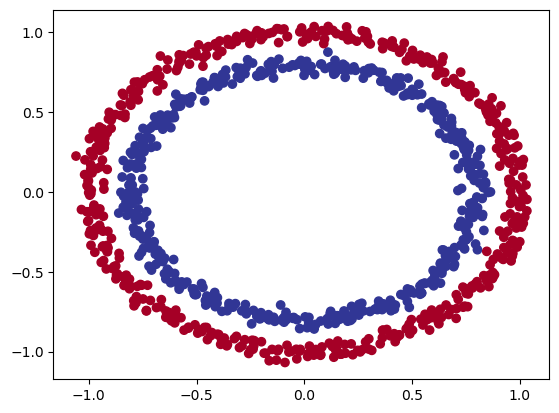

In [10]:
# Visualizez, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0], y= X[:,1], c=y,cmap=plt.cm.RdYlBu)

Note: the data we're wroking with if often referred to as a toy dataset, a datatset that is small enough to experience with but big enough to understand things with.

### 1.1 Check input and output shapes

In [11]:
X.shape, y.shape

((1000, 2), (1000,))

In [12]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [13]:
# View the first example of features and labels
X_sample =X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [14]:
# Turn data into tensors
import torch
torch.__version__

'2.5.1'

In [22]:
# X = torch.from_numpy(X).type(torch.float)
# y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [23]:
# Split data into trianing and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code wiill run on an acceleartor (GPU) if there is one
2. Contruct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer 
4. Create a training and test loop

In [26]:
# Import pytorch and nn
import torch
from torch import nn
# make device afnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [27]:
X_train # defined already

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [32]:
X[0,0], X[0,1],X[0]

(tensor(0.7542), tensor(0.2315), tensor([0.7542, 0.2315]))

Now we've setup device agnostic code, let's create a model that:
1. Subclass `nn.Module` (salmost all models in pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass
4. Instatiate an instnace of our model class nad send it to the target `device`

In [38]:
# 1. Construct a model that subclasses nn/Module

class CirculeModelV0(nn.Module):
    def __init__(self):
        super().__init__()

        # 2. create 2 mm.linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # in_feature must match the out_features of the previous


        # self.two_linear_layers = nn.Sequential(
        #     nn.Linear(in_features=2, out_features=5),
        #     nn.Linear(in_features=5, out_features=1)
        # )
    # 3. define a forward() method that outlines th eforward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
        
# 4. instantiate an instnace of our model class and send it ot the target device
model_0 = CirculeModelV0().to(device)
model_0

CirculeModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [39]:
device

'cpu'

In [40]:
next(model_0.parameters()).device # our model is in cpu

device(type='cpu')

In [37]:
# Let's replicate the model above using nn.sequentrial()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [41]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.0357,  0.1580],
                      [-0.6808,  0.4405],
                      [-0.4245, -0.6400],
                      [-0.1290,  0.5689],
                      [-0.2116, -0.0506]])),
             ('layer_1.bias',
              tensor([-0.2999, -0.5375, -0.2592, -0.0621, -0.5586])),
             ('layer_2.weight',
              tensor([[-0.1297,  0.0098,  0.3527, -0.0747,  0.0179]])),
             ('layer_2.bias', tensor([0.2418]))])

In [45]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
 tensor([[0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [-0.]])

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [43]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification you might want binary cross entropy or categorical cross entropy.

As a remainder, the loss function measures how *wrong* your predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however, PyTorch has a lot other built-in optimizers.

* For the loss function we're going to use `torch.nnBECWithLogitsLoss()`, for more you are going to use the following link:
* For different optimizers use `torch.optim` 

In [47]:
# Setup tjhe loss function
# loss_fun = nn.BCELoss() # requires inputs to have gone gthrough the sigmoid function prior to input to BCE loss
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )
loss_fun = nn.BCEWithLogitsLoss() # this has sigmoid activiation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)




In [57]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train model

To train our model, we're going to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient step)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these logits into predcition prbabilities by passing them to some kind of activiation function (e.g. sigmoid for binary crossentropy and softmax for multiclass classification).

Then we can convert our model's prediciton prbabilities to **prediciton labels** by either roinding them or taking the `argmax()`

In [49]:
# View the first outputs fo the forward passs on the test data
model_0.eval() # use this when evaluating model
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5] # raw output
y_logits

tensor([[ 0.0386],
        [-0.0975],
        [ 0.3710],
        [-0.0554],
        [ 0.3320]])

In [50]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [51]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5097],
        [0.4756],
        [0.5917],
        [0.4862],
        [0.5823]])

For our prediction probabilitiy values, we need to perform a range-style rounding on them:
* `y_pred_rpbs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [53]:
# Find the predicted labels 
# torch.round(y_pred_probs)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of exatra dimension 
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 0., 1., 0., 1.])

### 3.2 Building and training a test loop

In [79]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

    ### training
    model_0.train()

    # 1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs _> pred labels

    # 2. Calculate loss/accuracy
    # loss = loss_fun(torch.sigmoid(y_logits), ## bb.BCELoss expects prediction probabilities as input
    #                 y_train)
    loss = loss_fun(y_logits, # nn.BCEWithLogitsLOss expects raw lkogits as input
                    y_train)
    acc = accuracy_fn(y_true = y_train,
                      y_pred = y_pred)
    
    # Optimizer zzero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### testing
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. caclculate testl loss/acc
        test_loss = loss_fun(test_logits,
                             y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print out what's hapenning
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss: .5f}, Acc : {acc: .2f}% | test loss: {test_loss: .5f}, test_acc: {test_acc: .2f}%")



Epoch: 0 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 100 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 200 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 300 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 400 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 500 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 600 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 700 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 800 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%
Epoch: 900 | Loss:  0.69298, Acc :  51.00% | test loss:  0.69468, test_acc:  46.00%


## 4. Make predictions and evaluate the model

From the metrics, it looks like our model isn't learning anything...

So to inspect it let's make some predictions and male them visual!

In other words, "visualize, visualize, visualize!"

To do so, we're going to import a function called `plot_decision_boundary()`

In [76]:
import requests
from pathlib import Path

# DOwnload helper functions from learn pytorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper function already exists")
else:
    print("Downlpad helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

Downlpad helper_functions.py


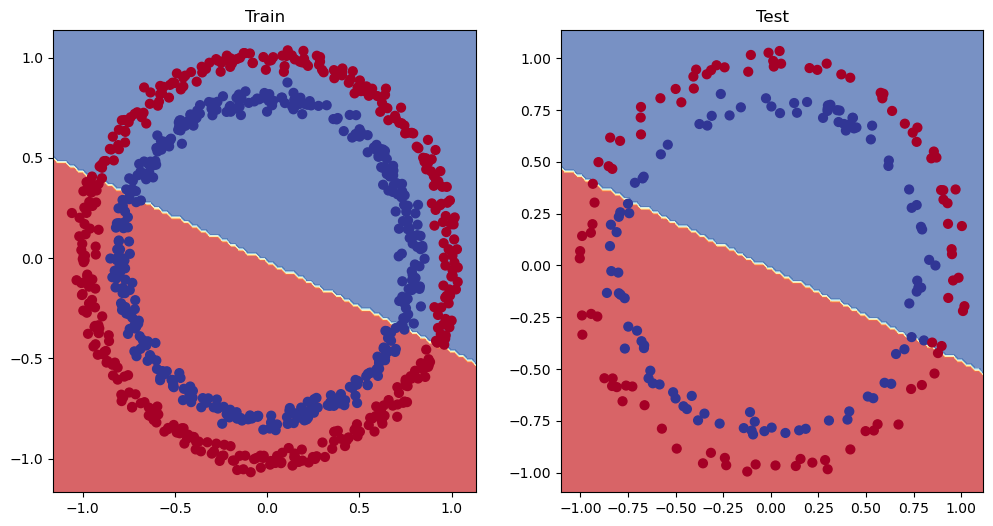

In [77]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patternsi in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function (not really in our case possibly)
* Change the optimizer

These options are all from a model's perspective becayuse they deal directly  with the model, rather than the data.

And because these options are all values we can change, they are referred to as **hyperparameters**.

Let's try and imrpvode our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2->3
* Increase the number of epochs: 100 -> 1000

In [81]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [82]:
# Create a loss function

loss_fun = nn.BCEWithLogitsLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [84]:
torch.manual_seed(42)

epochs = 1000

# put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### training
    model_1.train()

    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. calculate th loss/acc
    loss = loss_fun(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward (backpropagation)
    loss.backward()


    # 5. optimizer step (gradient descent)

    optimizer.step()

    ### testing
    model_1.eval()

    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2. calculate loss
        test_loss = loss_fun(test_logits, y_test)
        test_acc= accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"epoch: {epoch} | loss: {loss: .5f}, acc: {acc:.2f}% | test_loss: {test_loss: .5f}, test acc: {test_acc:.2f}% ")
        

epoch: 0 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 100 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 200 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 300 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 400 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 500 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 600 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 700 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 800 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 
epoch: 900 | loss:  0.69298, acc: 51.00% | test_loss:  0.69468, test acc: 46.00% 


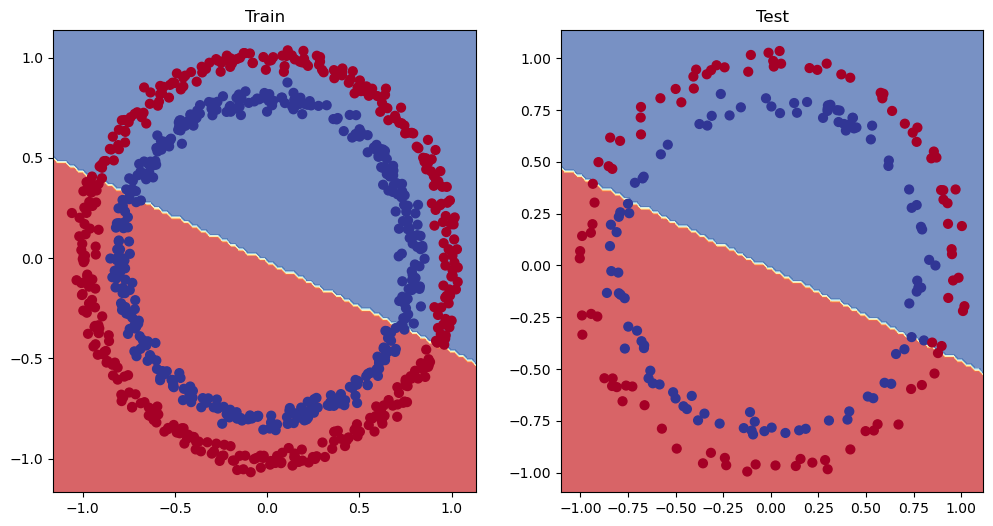

In [85]:
# plot the decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5.1 Preparing our data to see if our model can fit a striaght line

One way to troubleshoot a larger problem is to test our a smaller problem.

In [87]:
# Create some data (same as notebook 01)

weight = 0.7
bias = 0.3
start =0 
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias
# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [88]:
# Create train and test splits

train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression =X_regression[train_split:], y_regression[train_split:]
# Check the lengths of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

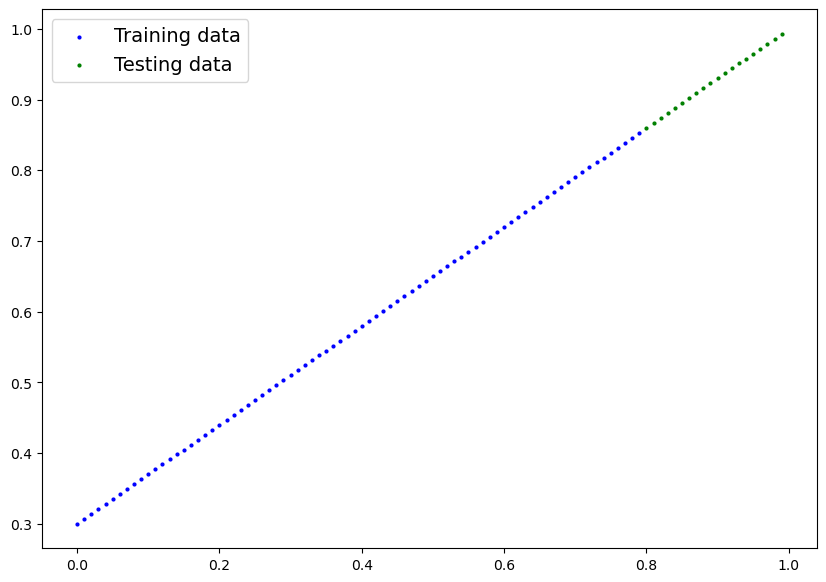

In [89]:
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

In [90]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 Adjusting `model_1` to fit a straight line

In [93]:
# Same archetuctre as model_1 (but using nn.sqeuntial)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [96]:
# Loss and optimizer

loss_fn= nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [97]:
# train the model
torch.manual_seed(42)


# set the number of epochs
epochs = 1000

# put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# train 

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # testing
    model_2.eval()

    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss=  loss_fn(test_pred, y_test_regression)

    # print out what's hapenning
    if epoch % 100 == 0:
        print(f"epoch: {epoch} | loss: {loss: .5f}| test_loss: {test_loss: .5f} ")



epoch: 0 | loss:  0.06455| test_loss:  0.12449 
epoch: 100 | loss:  0.00696| test_loss:  0.00109 
epoch: 200 | loss:  0.00635| test_loss:  0.00121 
epoch: 300 | loss:  0.00604| test_loss:  0.00098 
epoch: 400 | loss:  0.00633| test_loss:  0.00166 
epoch: 500 | loss:  0.00631| test_loss:  0.00137 
epoch: 600 | loss:  0.00629| test_loss:  0.00110 
epoch: 700 | loss:  0.00659| test_loss:  0.00160 
epoch: 800 | loss:  0.00627| test_loss:  0.00148 
epoch: 900 | loss:  0.00625| test_loss:  0.00118 


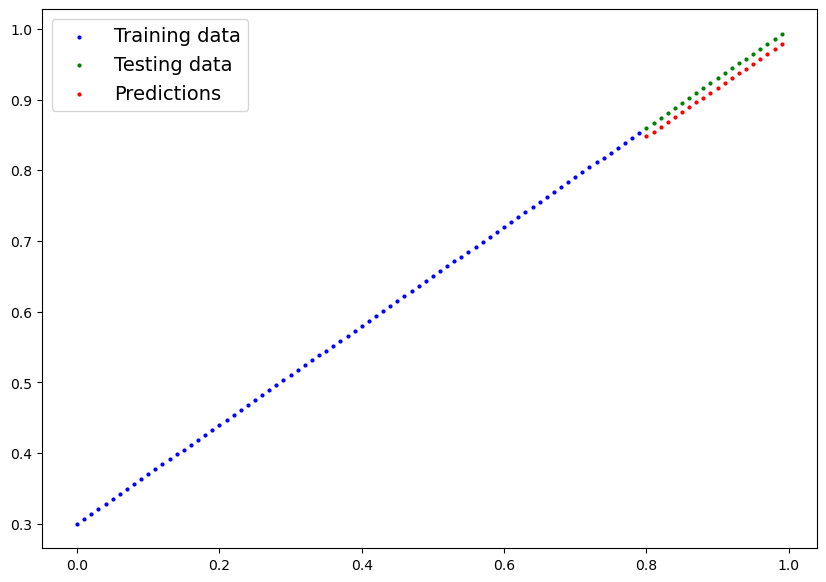

In [98]:
# Turn on evaluation mode
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# plot data and predictions
plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression, predictions=y_preds)

## 6. The missing piece: non-linearity

"What patterns coudl you draw if you were given an infinite amount of a stright and non-straight lines?"

Or in machine learningm terms, an infinite of linear nad non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

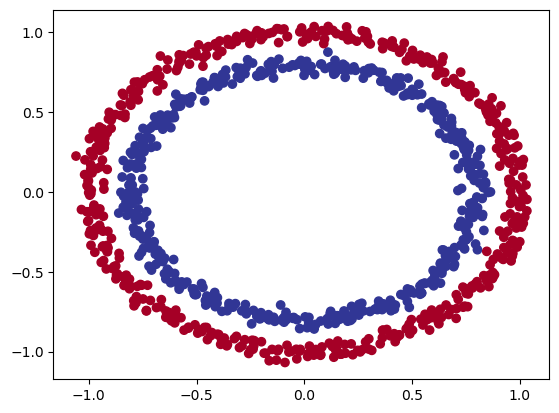

In [99]:
# Make and plot data
import matplotlib.pyplot as plt
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

In [102]:
# convert data to tensors and then to train and tets splits
import torch 
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train[:5], y_train[:5]


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-lineaerity

* Linear = straight lines
* Non-linear: non-striaght lines

Artificla neural networks ar ea large combination of linear and non linear functions which are potentially able to find patterns in data.

In [103]:
# Build a model with non-linear activation functions
from torch import nn
class CirculeModelV2(nn.Module):
    def __init__ (self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # non linear
    def forward(self, x):
        # where should we put or non-linear actiavtion functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CirculeModelV2().to(device)
model_3


CirculeModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [104]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr = 0.1)


### 6.3 Training model with non linearity

In [114]:
# Random seeds
torch.manual_seed(42)

# put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# loop through data
epochs = 1000

for epoch in range(epochs):
    ### training
    model_3.train()

    # 1. forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. calc loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. 
    optimizer.zero_grad()

    #4. loss backward
    loss.backward()

    # 5. step the optimizer
    optimizer.step()

    ### testing

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # print out
    if epoch % 100 == 0:
        print(f"epoch: {epoch} |LOss: {loss:.4f}, Acc : {acc:.2f} | test loss: {test_loss:.4f}, test acc: {test_acc: .2f}")

epoch: 0 |LOss: 0.0043, Acc : 100.00 | test loss: 0.0145, test acc:  99.50
epoch: 100 |LOss: 0.0042, Acc : 100.00 | test loss: 0.0144, test acc:  99.50
epoch: 200 |LOss: 0.0042, Acc : 100.00 | test loss: 0.0143, test acc:  99.50
epoch: 300 |LOss: 0.0041, Acc : 100.00 | test loss: 0.0142, test acc:  99.50
epoch: 400 |LOss: 0.0040, Acc : 100.00 | test loss: 0.0142, test acc:  99.50
epoch: 500 |LOss: 0.0040, Acc : 100.00 | test loss: 0.0141, test acc:  99.50
epoch: 600 |LOss: 0.0039, Acc : 100.00 | test loss: 0.0140, test acc:  99.50
epoch: 700 |LOss: 0.0039, Acc : 100.00 | test loss: 0.0139, test acc:  99.50
epoch: 800 |LOss: 0.0038, Acc : 100.00 | test loss: 0.0139, test acc:  99.50
epoch: 900 |LOss: 0.0038, Acc : 100.00 | test loss: 0.0138, test acc:  99.50


### 6.4 Evaluating a model trained with non linear actiavtion functions

In [115]:
# Make predictions
model_3.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

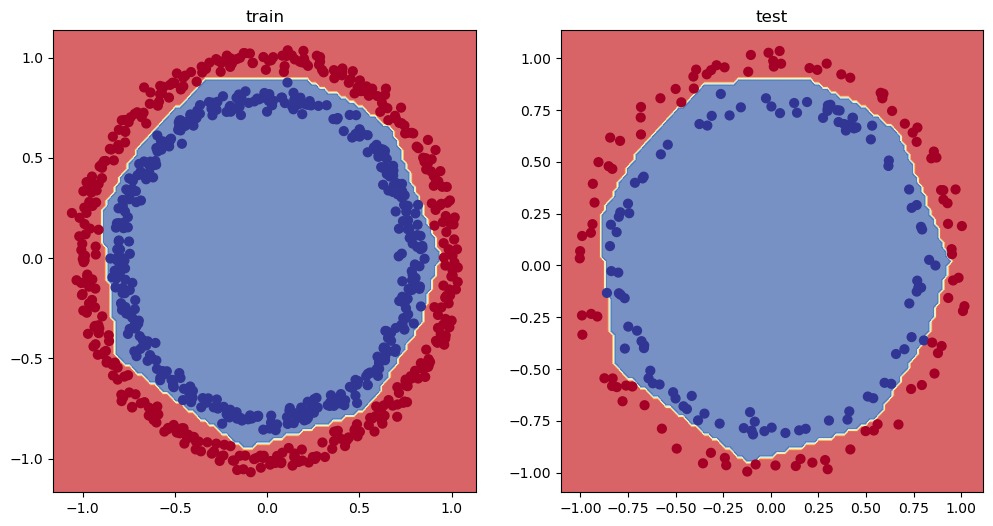

In [116]:
# plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. replicating non linear activation functions

Neural networks, rathern than us telling the model what to learn, we give it thte tools to disocver patterns in data naad tries to figure out the patterns on its own.

And these tools are linear and non linear funcgtions

In [118]:
# Create a tesnor

A = torch.arange(-10,10,1, dtype=torch.float32)
A.dtype

torch.float32

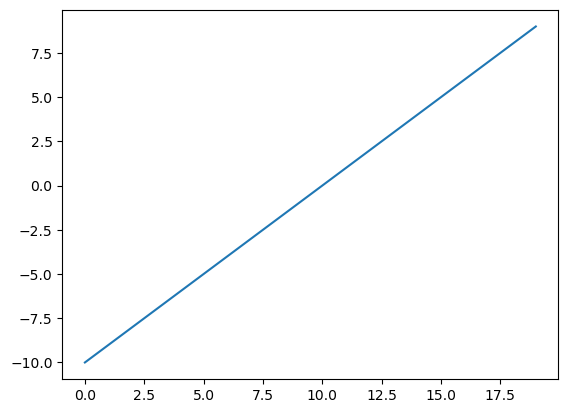

In [120]:
# visualize the tensor
plt.plot(A);

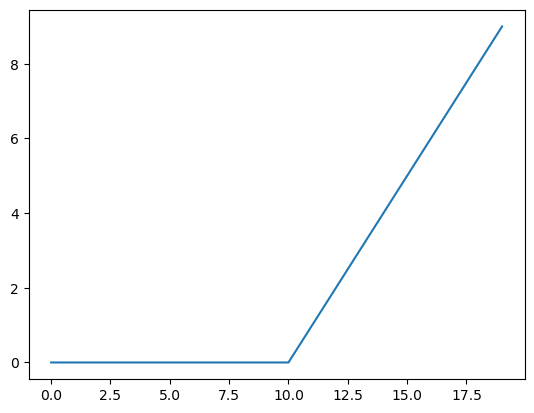

In [122]:
plt.plot(torch.relu(A))

In [124]:
def relu(x: torch.tensor) -> torch.tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

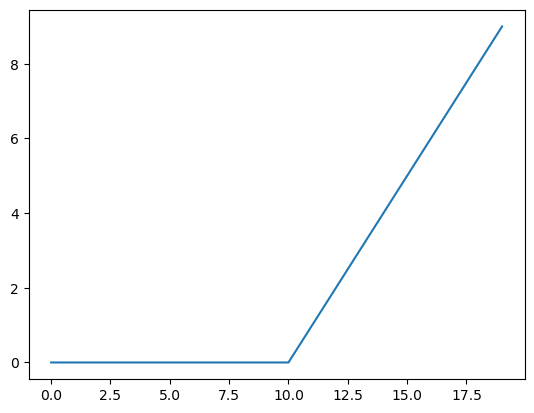

In [125]:
# plot relu activation function
plt.plot(relu(A))

In [126]:
# Now let's do the same for sigmoid
def sigmoid (x) :
    return 1/(1 + torch.exp(-x))


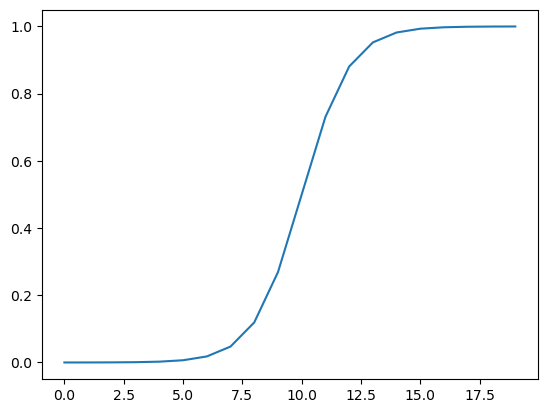

In [130]:
plt.plot(torch.sigmoid(A));

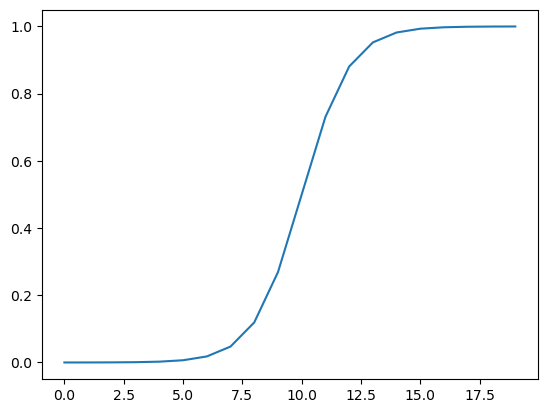

In [131]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a multi-class classification problem

* Binary classificaiton  = one thing or another like caty vs dog and spam vs not spam.
* Multi-class classification = more than one thing or another

### 8.1 Creating a toy multi class dataset

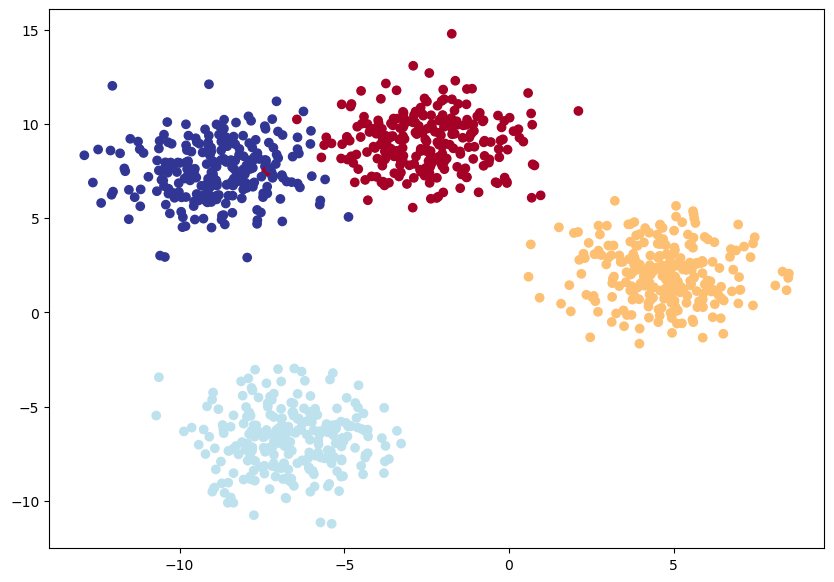

In [157]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std= 1.5,
                            random_state=RANDOM_SEED)
# 2. turn your data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state = RANDOM_SEED)

# 4. plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap = plt.cm.RdYlBu);


## 8.2 building a multi class classificaiton model in PyTorch

In [158]:
## create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [159]:
# build a multiclass classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        
        """
        Args:
            input featrures : number of inputs features to the model
            output features: number of output features
            hidden units: number of hidden units between layers, default 8
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of blobmodel and send it to the target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 create a loss function an dan optimzier for a multi class classification model


In [160]:
# create a loss function for multi classication 
loss_fn = nn.CrossEntropyLoss()

# create an optimzier for multi class classification
optimizer = torch.optim.SGD(params=model_4.parameters(), lr = 0.1)


### 8.4 Getting prediction probabilities for a multi class pytorch model

In order to evlute and train and test our model, we need to conver our mdel's logits to prediction probabilities and then to prediction labels

logits -> pred probs -> pred labels

In [161]:
# ;ets get some raw outpits of our model (logits)
model_4.eval()
with torch.inference_mode():

    y_preds = model_4(X_blob_test)
y_preds[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [162]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [163]:
# convert our model's logits outputs to prediciton porbabilitlies
y_pred_probs = torch.softmax(y_preds, dim=1)
print(y_pred_probs[:5])
print(y_blob_test[:5])
print(y_logits[:5]);

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])
tensor([1, 3, 2, 1, 0])
tensor([[-0.3124, -0.6023,  0.4773,  0.1037],
        [-0.7406,  0.2734, -0.3555,  0.2268],
        [-0.3833,  0.1871, -0.0144,  0.2879],
        [-0.2609, -0.0687,  0.2424,  0.0547],
        [-0.5362,  0.1680, -0.2141,  0.0923]], grad_fn=<SliceBackward0>)


In [164]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [165]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [166]:
torch.argmax(y_pred_probs[0]) # tells as the index of the prediction

tensor(1)

In [167]:
# convert our model's prediciton probabutlies to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [168]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 creating a trainig loop and tetsing loop for multi class pytorch model

In [170]:
# fit the multi class model to the data
torch.manual_seed(42)

# set number of epochs 
epochs = 100

# put data to the target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# loop through the data
for epoch in range(epochs):
    ### trainng
    model_4.train()

    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### testing
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc= accuracy_fn(y_true=y_blob_test, y_pred=test_preds)

    if epoch % 10 == 0:
        print(f"epoch : {epoch} loss: {loss: .4f} acc : {acc:.2f}  test loss: {test_loss: .4f} test acc: {test_acc: .2f}")


epoch : 0 loss:  1.0636 acc : 54.62  test loss:  1.0039 test acc:  55.00
epoch : 10 loss:  0.6210 acc : 97.25  test loss:  0.6367 test acc:  98.00
epoch : 20 loss:  0.4061 acc : 98.75  test loss:  0.4104 test acc:  100.00
epoch : 30 loss:  0.2362 acc : 99.12  test loss:  0.2268 test acc:  99.50
epoch : 40 loss:  0.1044 acc : 99.25  test loss:  0.0949 test acc:  99.50
epoch : 50 loss:  0.0640 acc : 99.25  test loss:  0.0563 test acc:  99.50
epoch : 60 loss:  0.0497 acc : 99.25  test loss:  0.0419 test acc:  99.50
epoch : 70 loss:  0.0424 acc : 99.25  test loss:  0.0343 test acc:  99.50
epoch : 80 loss:  0.0380 acc : 99.25  test loss:  0.0295 test acc:  99.50
epoch : 90 loss:  0.0350 acc : 99.25  test loss:  0.0264 test acc:  99.50


### 8.6 Making and evaluating predictions with a PyTorch multiclass model 

In [178]:
# make predictions
model_4.eval()
with torch.inference_mode():
    y_logits =model_4(X_blob_test)

# view the first 10 predictions
y_logits[:10]

tensor([[-0.6257,  6.0063, -7.6488, -8.4666],
        [-2.1813, -6.3889, -3.7303,  3.1376],
        [-3.4241, -3.9088,  3.1701, -2.6211],
        [-1.1539,  4.2110, -3.8565, -4.8926],
        [ 3.7713, -1.3379, -9.1623, -6.9665],
        [-2.8284, -7.5936, -4.3072,  3.8118],
        [-3.0427, -3.3442,  2.8070, -2.1454],
        [ 3.3902, -4.0445, -6.9149, -3.5610],
        [-4.3793, -5.0066,  3.8291, -3.3930],
        [ 3.5159, -3.0320, -7.5575, -4.7203]])

In [179]:
# GO from logits -> prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3158e-03, 9.9868e-01, 1.1725e-06, 5.1754e-07],
        [4.8691e-03, 7.2458e-05, 1.0344e-03, 9.9402e-01],
        [1.3611e-03, 8.3833e-04, 9.9476e-01, 3.0383e-03],
        [4.6540e-03, 9.9492e-01, 3.1196e-04, 1.1070e-04],
        [9.9397e-01, 6.0044e-03, 2.4010e-06, 2.1578e-05],
        [1.3046e-03, 1.1116e-05, 2.9733e-04, 9.9839e-01],
        [2.8462e-03, 2.1055e-03, 9.8807e-01, 6.9819e-03],
        [9.9842e-01, 5.8948e-04, 3.3409e-05, 9.5600e-04],
        [2.7205e-04, 1.4528e-04, 9.9885e-01, 7.2945e-04],
        [9.9829e-01, 1.4306e-03, 1.5493e-05, 2.6443e-04]])

In [180]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [181]:
# go from pre probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [182]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

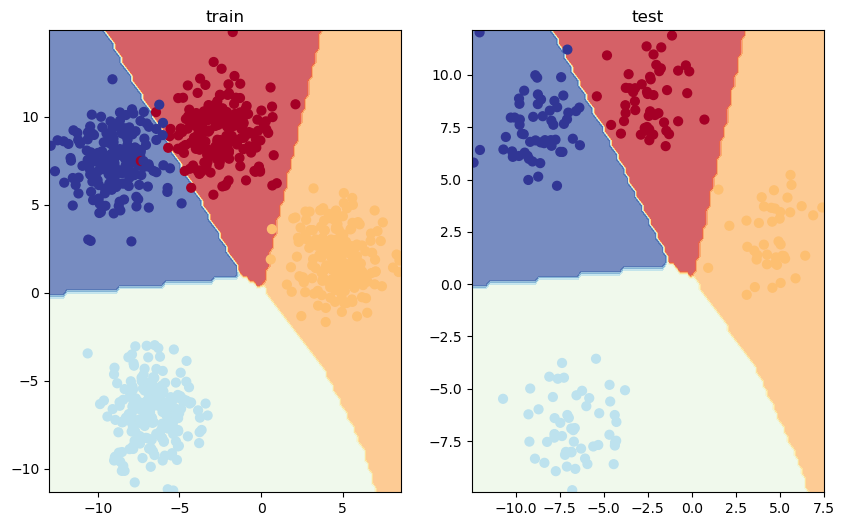

In [184]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. A few more classification metrics ... (to evaluate our classification model)

* Accuracy - out of 100 samples, how many does our model get right?
* Precision
* Recall
* f1-score
* Confusion matrix
* Classification report

If you want access to a lot of pytorch metrics, you can see the link here



In [185]:
!pip install torchmetrics # install if not already installed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 2.3 MB/s eta 0:00:00a 0:00:01


In [189]:
from torchmetrics import Accuracy

# setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# calculat ethe accuracy 
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)

### Exercises and extra curriculum 

See exercieses and extra-curicculum here - see the github from the course 



